In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Load dataset and convert to DataFrame:

In [2]:
# Load the dataset
housing = fetch_california_housing()

# Convert to DataFrame:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

In [13]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target variable to the DataFrame
df['MedHouseVal'] = housing.target

## Quick Check of Data

In [27]:
# Inspect the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Check the features and target variable. Identify which is continuous and categorical if applicable.

In [25]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [45]:
# Dataset statistical properties
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Dataset type and detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


## EDA and Data Preprocessing

In [10]:
# Check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


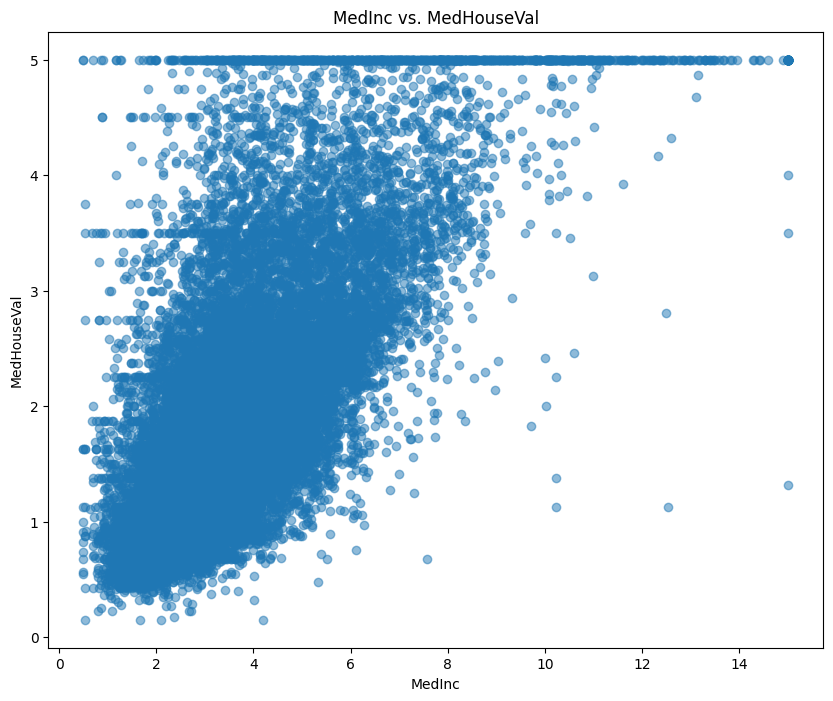

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.title('MedInc vs. MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()

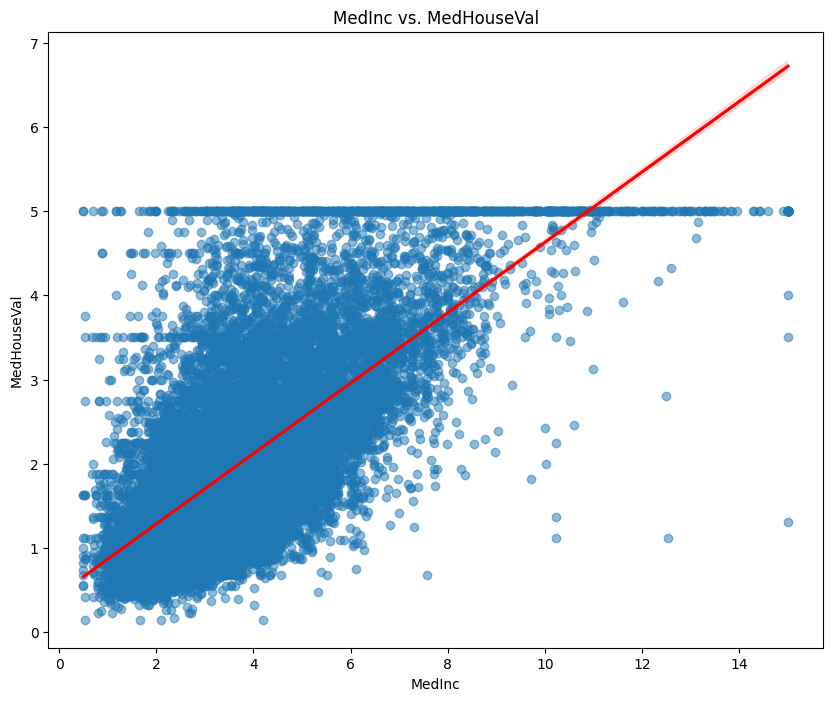

In [28]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='MedInc', y='MedHouseVal', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('MedInc vs. MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()


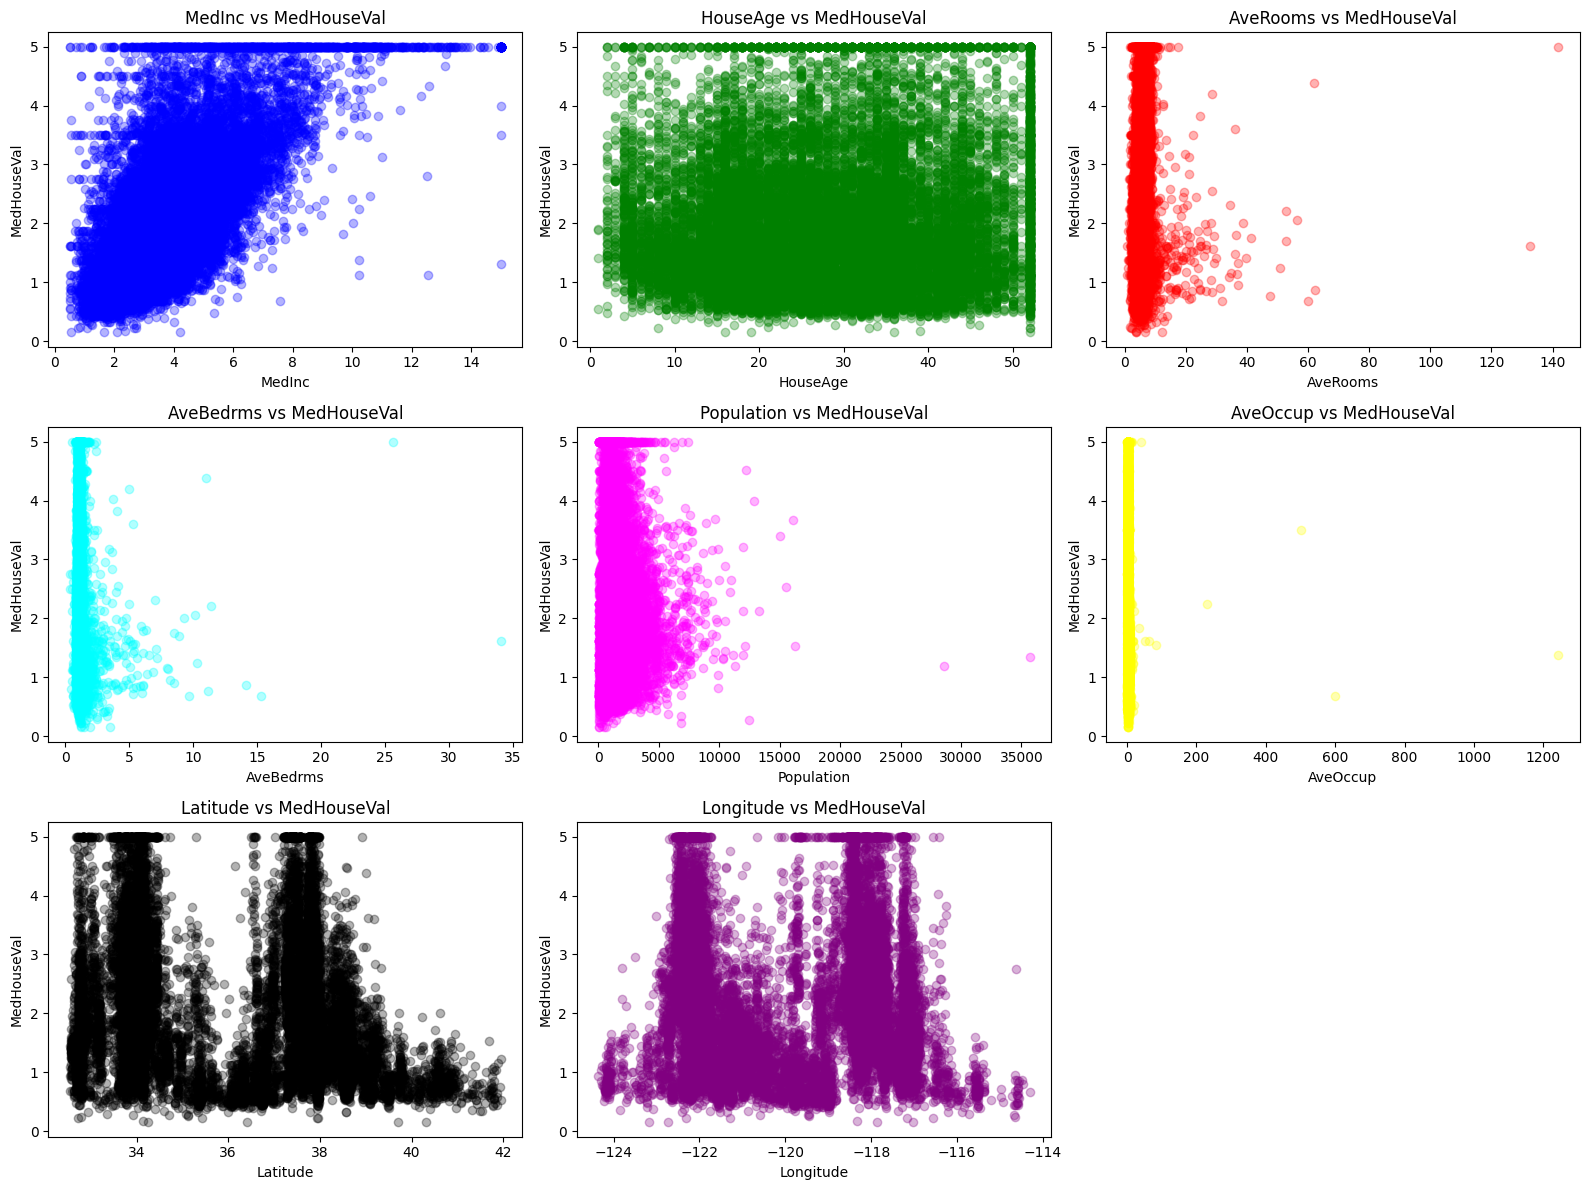

In [19]:
# Visualize the data.
# Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal)

# Set up plotting
plt.figure(figsize=(16, 12))

# Define a list of colors for the scatter plots
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple']

# Plot each feature against MedHouseVal
for i, column in enumerate(housing.feature_names):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[column], df['MedHouseVal'], alpha=0.3, color=colors[i])
    plt.title(f'{column} vs MedHouseVal')
    plt.xlabel(column)
    plt.ylabel('MedHouseVal')

plt.tight_layout()
plt.show()

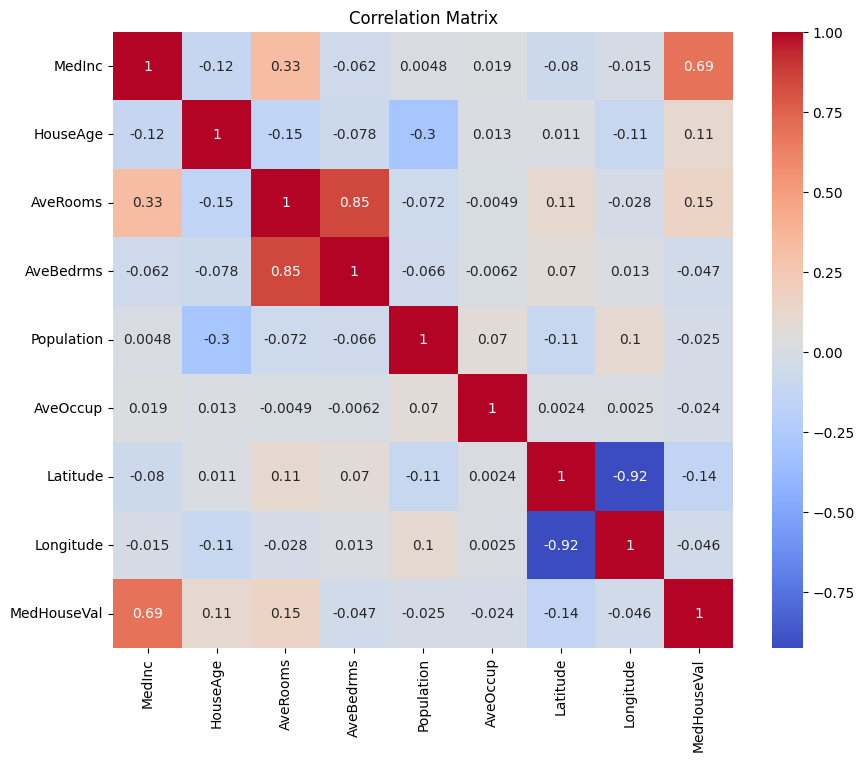

In [20]:
# correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ML Model Training

X features HouseAge, AveRooms, AveBedrms, Population, AveOccup,Latitude and Longitude

In [80]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.6125511913966952


## Interpretation:
## The model explains approximately 61.26% of the variance in house prices in the training data.

In [31]:
# Predict on test set
y_pred = model.predict(X_test)

In [54]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

MSE: 1.1187
RMSE: 1.0577
R-squared: 0.1463


## Interpretation:
Linear Regression achieved a moderate fit on training data, explaining approximately 61% of the variance. However, on test data, the model's performance dropped significantly, explaining only around 14.6% of the variance with a high average prediction error (~$105,770). This indicates the model struggles to generalize and capture complex relationships in housing prices.

In [76]:
A = df.drop('AveOccup', axis=1)
b = df['AveOccup']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [77]:
# Regression model
model = LinearRegression()
model.fit(A_train, b_train)
print(model.score(A_train, b_train))

0.012785690874815847


In [78]:
# Predict on test set
b_pred = model.predict(A_test)

In [79]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(b_test, b_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, b_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

MSE: 4.2278
RMSE: 2.0562
R-squared: -0.3756


In [49]:
# Define the new input data with the correct order of features:
# ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
new_data = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])

# Make a prediction
predicted_value = model.predict(new_data)

# Print the predicted median house value
print(f"Predicted Median House Value: {predicted_value[0]:.4f}")


Predicted Median House Value: 1.5487


## Interpretation
The model predicts the median house value for the given input features to be
1.5487 this corresponds to approximately $154,870.

## KNN regressor with 5 neighbors

In [82]:
# Initialize KNN regressor with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)
print(knn_model.score(X_train, y_train))


0.45292523357436765


## Interpretation:
The KNN model explains about 45.3% of the variance in the training data.

In [83]:
# Predict on test set
y_pred = knn_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1.0577
R² Score: 0.1463


## Interpretation:
RMSE (Root Mean Squared Error) = 1.0577
The model's predictions on the test set are off by about $105,770 on average.

R² Score = 0.1463
The model explains only about 14.63% of the variance in the test data, indicating a poor fit and weak predictive performance.

In [84]:
new_data = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])  # same feature order as training set
prediction = knn_model.predict(new_data)
print(f"Predicted Median House Value: {prediction[0]:.4f}")


Predicted Median House Value: 1.8174


## Interpretation
This outputs the predicted value (e.g., 1.8174), meaning the model estimates the median house price as approximately $181,740 for that input.

## Random Forest Regressor

In [85]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))


0.9735726320302575


## Interpretation:
Random Forest model explains about 97.4% of the variance in the training data.

This shows a very good fit on training data, meaning the model captures most of the patterns.

In [87]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R-squared: {r2_rf:.4f}")


Random Forest MSE: 0.2554
Random Forest RMSE: 0.5053
Random Forest R-squared: 0.8051


## Interpretation:
RMSE = 0.5053
The model's average prediction error is about $50,530, which is quite accurate for housing price predictions.

R² = 0.8051
The  model explains 80.5% of the variance in housing prices — a very good fit on unseen/test data.

## In conclusion:
Linear Regression and KNN both performed poorly on test data, each with high error (~$105,770) and low R² (~14.6%), indicating they could not effectively capture complex relationships in the data.

Random Forest Regression dramatically outperformed both, with an RMSE of $50,530 and R² of 80.5%, showing it is highly capable of learning non-linear interactions and patterns in the housing data.